In [1]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import altair as alt
alt.data_transformers.disable_max_rows()
alt.display.renderers.enable('svg')
import matplotlib.pyplot as plt

import act
import act.discovery, act.io

import metpy.calc, metpy.constants
from metpy.units import units
import glob
from tqdm import tqdm
from sublimpy import utils
import datetime as dt

In [2]:
# for SAIL data queries
username = os.getenv("ARM_USERNAME")
token = os.getenv("ARM_TOKEN")
start_date = "20230409"
end_date = "20230419"
data_dir = "/Users/elischwat/Development/data/sublimationofsnow/"

# Observations - comparison of two dates

## Open data for two dates

### SOS towers

In [3]:
sos_df = pd.read_parquet("../paper1/process_slow_data/tidy_df_20221101_20230619_planar_fit_multiplane_q7_flags9000_pf10.parquet")
sos_df_localtime = utils.modify_df_timezone(
    sos_df,
    'UTC',
    'US/Mountain'
)


### Gothic Sail Tower data

In [7]:
# Define the data codes for meteorological and turbulence data
data_codes = [
    'gucmetM1.b1',  # Example data code for meteorological data
    'guc30ecorS3.b1'  # Example data code for turbulence data
]

# Loop through each data code and download the data
data_dict = {}
for data_code in data_codes:
    files = act.discovery.download_arm_data(
        username,  # Replace with your ARM username
        token,        # Replace with your ARM token
        data_code,
        start_date,
        end_date,
        output = os.path.join(data_dir, data_code)
    )
    print(files)
    # Load the data into an ACT object and append to the list
    ds = act.io.read_arm_netcdf(files)
    data_dict[data_code] = ds

gothic_met = data_dict[data_codes[0]]
gothic_ec = data_dict[data_codes[1]]

ARM Data Live Webservice does not appear to be functioning
[]


OSError: no files to open

In [73]:
from datetime import datetime, timedelta

def generate_date_range(start_date, end_date):
    # Parse the input dates
    start = datetime.strptime(start_date, '%Y%m%d')
    end = datetime.strptime(end_date, '%Y%m%d')
    
    # Generate the list of dates
    date_list = []
    current_date = start
    while current_date <= end:
        date_list.append(current_date.strftime('%Y%m%d'))
        current_date += timedelta(days=1)
    
    return date_list
dates = generate_date_range(start_date, end_date)
dates

['20221130',
 '20221201',
 '20221202',
 '20221203',
 '20221204',
 '20221205',
 '20221206',
 '20221207',
 '20221208',
 '20221209',
 '20221210',
 '20221211',
 '20221212',
 '20221213',
 '20221214',
 '20221215',
 '20221216',
 '20221217',
 '20221218',
 '20221219',
 '20221220',
 '20221221',
 '20221222',
 '20221223',
 '20221224',
 '20221225',
 '20221226',
 '20221227',
 '20221228',
 '20221229',
 '20221230',
 '20221231',
 '20230101',
 '20230102',
 '20230103',
 '20230104',
 '20230105',
 '20230106',
 '20230107',
 '20230108',
 '20230109',
 '20230110',
 '20230111',
 '20230112',
 '20230113',
 '20230114',
 '20230115',
 '20230116',
 '20230117',
 '20230118',
 '20230119',
 '20230120',
 '20230121',
 '20230122',
 '20230123',
 '20230124',
 '20230125',
 '20230126',
 '20230127',
 '20230128',
 '20230129',
 '20230130',
 '20230131',
 '20230201',
 '20230202',
 '20230203',
 '20230204',
 '20230205',
 '20230206',
 '20230207',
 '20230208',
 '20230209',
 '20230210',
 '20230211',
 '20230212',
 '20230213',
 '20230214',

In [9]:

files = pd.Series(dates).apply(
    lambda d: glob.glob(os.path.join(data_dir, 'guc30ecorS3.b1', f"*{d}*.cdf"))
)
files = sorted(list((files).explode()))
sail_ecor_ds = xr.open_mfdataset(files)
sail_ecor_df = sail_ecor_ds.to_dataframe().reset_index()
sail_ecor_df_localtime = utils.modify_df_timezone(sail_ecor_df, 'UTC', 'US/Mountain')
sail_ecor_df_localtime = sail_ecor_df_localtime.query("bound == 0") ##???
sail_ecor_df_localtime

,time,bound,base_time,time_offset,time_bounds,mean_u,qc_mean_u,mean_v,qc_mean_v,mean_w,...,mean_spk_t,mean_spk_q,mean_spk_c,n_bad_sonic,n_bad_irga,n_bad_irga_light,mean_cooler,lat,lon,alt
0,2023-04-08 18:00:00,0,2023-04-09,2023-04-09 00:00:00,2023-04-08 23:30:00,-2.3320,0,-0.8752,0,-0.089060,...,279.299988,NaN,13.15,0.0,0.0,0.0,1.278,38.941555,-106.973129,2857.0
2,2023-04-08 18:30:00,0,2023-04-09,2023-04-09 00:30:00,2023-04-09 00:00:00,-1.2930,0,-1.1570,0,-0.032080,...,NaN,NaN,13.07,0.0,0.0,0.0,1.265,38.941555,-106.973129,2857.0
4,2023-04-08 19:00:00,0,2023-04-09,2023-04-09 01:00:00,2023-04-09 00:30:00,-1.9410,0,-2.7390,0,0.023000,...,NaN,NaN,13.17,0.0,0.0,0.0,1.255,38.941555,-106.973129,2857.0
6,2023-04-08 19:30:00,0,2023-04-09,2023-04-09 01:30:00,2023-04-09 01:00:00,-1.2840,0,-3.5410,0,0.102800,...,NaN,NaN,13.27,0.0,0.0,0.0,1.233,38.941555,-106.973129,2857.0
8,2023-04-08 20:00:00,0,2023-04-09,2023-04-09 02:00:00,2023-04-09 01:30:00,-0.4602,0,-1.7040,0,0.082940,...,NaN,NaN,NaN,0.0,0.0,0.0,1.218,38.941555,-106.973129,2857.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,2023-04-19 15:30:00,0,2023-04-19,2023-04-19 21:30:00,2023-04-19 21:00:00,-3.0500,0,-2.9310,0,-0.009853,...,263.000000,192.800003,13.34,0.0,0.0,0.0,1.179,38.941555,-106.973129,2857.0
1046,2023-04-19 16:00:00,0,2023-04-19,2023-04-19 22:00:00,2023-04-19 21:30:00,-2.4820,0,-4.5170,0,0.098570,...,264.500000,188.100006,13.35,1.0,0.0,0.0,1.174,38.941555,-106.973129,2857.0
1048,2023-04-19 16:30:00,0,2023-04-19,2023-04-19 22:30:00,2023-04-19 22:00:00,-2.6410,0,-4.1760,0,0.099270,...,265.200012,184.300003,13.35,0.0,0.0,0.0,1.172,38.941555,-106.973129,2857.0
1050,2023-04-19 17:00:00,0,2023-04-19,2023-04-19 23:00:00,2023-04-19 22:30:00,-3.5490,0,-2.5330,0,-0.028610,...,265.299988,188.699997,13.38,0.0,0.0,0.0,1.158,38.941555,-106.973129,2857.0


### Avery Picnic SPLASH Tower data

In [10]:
files = pd.Series(dates).apply(
    lambda d: glob.glob(os.path.join(data_dir, "asfs/ASFS-50_Level2_SPLASH2021-2023/", f"sledseb.asfs50.level2.0.10min.{d}*.nc"))
).explode()
files = sorted(files)
files

['/Users/elischwat/Development/data/sublimationofsnow/asfs/ASFS-50_Level2_SPLASH2021-2023/sledseb.asfs50.level2.0.10min.20230409.000000.nc',
 '/Users/elischwat/Development/data/sublimationofsnow/asfs/ASFS-50_Level2_SPLASH2021-2023/sledseb.asfs50.level2.0.10min.20230410.000000.nc',
 '/Users/elischwat/Development/data/sublimationofsnow/asfs/ASFS-50_Level2_SPLASH2021-2023/sledseb.asfs50.level2.0.10min.20230411.000000.nc',
 '/Users/elischwat/Development/data/sublimationofsnow/asfs/ASFS-50_Level2_SPLASH2021-2023/sledseb.asfs50.level2.0.10min.20230412.000000.nc',
 '/Users/elischwat/Development/data/sublimationofsnow/asfs/ASFS-50_Level2_SPLASH2021-2023/sledseb.asfs50.level2.0.10min.20230413.000000.nc',
 '/Users/elischwat/Development/data/sublimationofsnow/asfs/ASFS-50_Level2_SPLASH2021-2023/sledseb.asfs50.level2.0.10min.20230414.000000.nc',
 '/Users/elischwat/Development/data/sublimationofsnow/asfs/ASFS-50_Level2_SPLASH2021-2023/sledseb.asfs50.level2.0.10min.20230415.000000.nc',
 '/Users/elis

In [11]:
splash_asfs_ds = xr.open_mfdataset(files)
splash_asfs_df = splash_asfs_ds.to_dataframe().reset_index()
splash_asfs_df_localtime = utils.modify_df_timezone(splash_asfs_df, 'UTC', 'US/Mountain')
splash_asfs_df_localtime

,time,freq,dfreq,base_time,time_offset,lat,lon,heading,altitude,zenith_true,...,bulk_dqer,bulk_Cd,bulk_Ch,bulk_Ce,bulk_Cdn_10m,bulk_Chn_10m,bulk_Cen_10m,bulk_Rr,bulk_Rt,bulk_Rq
0,2023-04-08 18:00:00,0,0,2023-04-09,2023-04-09 00:00:00,38.972425,-106.996855,174.7,2933.5,72.691458,...,0.0,0.000402,0.000562,0.000582,0.001403,0.001301,0.001301,0.673443,0.971505,1.226211
1,2023-04-08 18:00:00,0,1,2023-04-09,2023-04-09 00:00:00,38.972425,-106.996855,174.7,2933.5,72.691458,...,0.0,0.000402,0.000562,0.000582,0.001403,0.001301,0.001301,0.673443,0.971505,1.226211
2,2023-04-08 18:00:00,0,2,2023-04-09,2023-04-09 00:00:00,38.972425,-106.996855,174.7,2933.5,72.691458,...,0.0,0.000402,0.000562,0.000582,0.001403,0.001301,0.001301,0.673443,0.971505,1.226211
3,2023-04-08 18:00:00,0,3,2023-04-09,2023-04-09 00:00:00,38.972425,-106.996855,174.7,2933.5,72.691458,...,0.0,0.000402,0.000562,0.000582,0.001403,0.001301,0.001301,0.673443,0.971505,1.226211
4,2023-04-08 18:00:00,0,4,2023-04-09,2023-04-09 00:00:00,38.972425,-106.996855,174.7,2933.5,72.691458,...,0.0,0.000402,0.000562,0.000582,0.001403,0.001301,0.001301,0.673443,0.971505,1.226211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702395,2023-04-19 17:50:00,59,55,2023-04-19,2023-04-19 23:50:00,38.972425,-106.996855,174.7,2933.5,68.834438,...,0.0,0.001689,0.001711,0.001759,0.001403,0.001301,0.001301,4.396139,1.750461,2.062534
5702396,2023-04-19 17:50:00,59,56,2023-04-19,2023-04-19 23:50:00,38.972425,-106.996855,174.7,2933.5,68.834438,...,0.0,0.001689,0.001711,0.001759,0.001403,0.001301,0.001301,4.396139,1.750461,2.062534
5702397,2023-04-19 17:50:00,59,57,2023-04-19,2023-04-19 23:50:00,38.972425,-106.996855,174.7,2933.5,68.834438,...,0.0,0.001689,0.001711,0.001759,0.001403,0.001301,0.001301,4.396139,1.750461,2.062534
5702398,2023-04-19 17:50:00,59,58,2023-04-19,2023-04-19 23:50:00,38.972425,-106.996855,174.7,2933.5,68.834438,...,0.0,0.001689,0.001711,0.001759,0.001403,0.001301,0.001301,4.396139,1.750461,2.062534


## Create Figure for Paper

In [12]:
surf_scaling_sos_df = sos_df_localtime[sos_df_localtime.variable.isin([
    'tke_3m_c',
    'spd_3m_c'
])].pivot_table(index='time', columns='variable', values='value').loc[start_date: end_date]
surf_scaling_sos_df = surf_scaling_sos_df.rename(columns = {
    'spd_3m_c': 'wind_speed',
    'tke_3m_c': 'TKE'
})
surf_scaling_sos_df

variable,wind_speed,TKE
time,,
2023-04-09 00:00:00,2.308832,0.413656
2023-04-09 00:30:00,2.152392,0.572132
2023-04-09 01:00:00,2.189626,0.380891
2023-04-09 01:30:00,1.387182,0.459206
2023-04-09 02:00:00,2.163823,0.325725
...,...,...
2023-04-19 21:30:00,3.187319,0.822570
2023-04-19 22:00:00,2.164419,0.637470
2023-04-19 22:30:00,3.927602,1.074988


In [13]:
surf_scaling_sail_df = sail_ecor_df_localtime.set_index('time')[['wind_spd']].join(
    0.5*(sail_ecor_df.set_index('time')[['var_u', 'var_v', 'var_w']]).sum(axis=1).rename('tke')
).drop_duplicates()
surf_scaling_sail_df = surf_scaling_sail_df.rename(columns = {
    'wind_spd': 'wind_speed',
    'tke': 'TKE'
})
surf_scaling_sail_df

,wind_speed,TKE
time,,
2023-04-08 18:00:00,2.492,NaN
2023-04-08 18:30:00,1.736,NaN
2023-04-08 19:00:00,3.357,NaN
2023-04-08 19:30:00,3.768,NaN
2023-04-08 20:00:00,1.767,NaN
...,...,...
2023-04-19 15:30:00,4.230,10.337000
2023-04-19 16:00:00,5.155,NaN
2023-04-19 16:30:00,4.942,2.226000


In [14]:
splash_shrink = splash_asfs_df_localtime[[
    'wspd_vec_mean',
    'time',
    'sigU',
    'sigV',
    'sigW',
]].drop_duplicates()
surf_scaling_splash_df = splash_shrink.set_index('time')[['wspd_vec_mean']].join(
    (splash_shrink.set_index('time')[['sigU', 'sigV', 'sigW']]**2).sum(axis=1).rename('tke')
)
surf_scaling_splash_df = surf_scaling_splash_df.rename(columns = {
    'wspd_vec_mean': 'wind_speed',
    'tke': 'TKE'
})
surf_scaling_splash_df = surf_scaling_splash_df.resample('30min').mean()

In [15]:
combo_surf_scaling_df = pd.concat([
        surf_scaling_sos_df.assign(site='sos'),
        surf_scaling_sail_df.assign(site='sail'),
        surf_scaling_splash_df.assign(site='splash')
    ]).reset_index()
combo_surf_scaling_df

,time,wind_speed,TKE,site
0,2023-04-09 00:00:00,2.308832,0.413656,sos
1,2023-04-09 00:30:00,2.152392,0.572132,sos
2,2023-04-09 01:00:00,2.189626,0.380891,sos
3,2023-04-09 01:30:00,1.387182,0.459206,sos
4,2023-04-09 02:00:00,2.163823,0.325725,sos
...,...,...,...,...
1578,2023-04-19 15:30:00,6.465134,0.746187,splash
1579,2023-04-19 16:00:00,6.769738,1.604725,splash
1580,2023-04-19 16:30:00,6.544220,1.425893,splash
1581,2023-04-19 17:00:00,4.031650,0.487735,splash


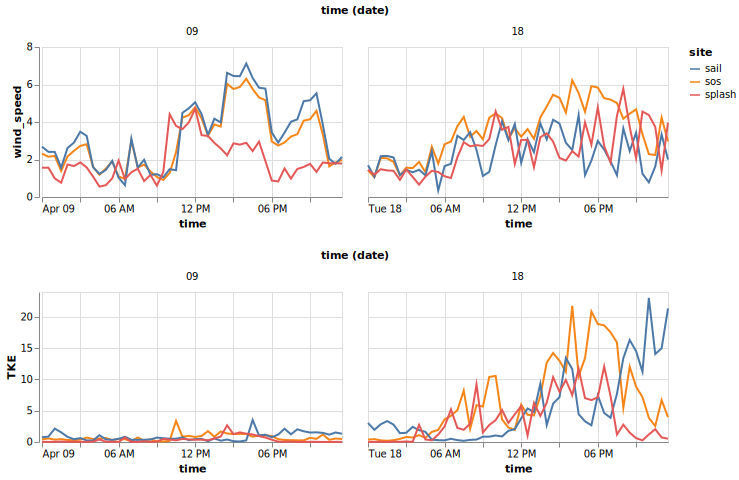

In [16]:
alt.Chart(
    combo_surf_scaling_df[
        (combo_surf_scaling_df.time.dt.date == dt.date(2023, 4, 9))
        |
        (combo_surf_scaling_df.time.dt.date == dt.date(2023, 4, 18))
    ]
).mark_line().encode(
    alt.X('time:T'),
    alt.Y('wind_speed:Q'),
    alt.Color('site:N'),
    alt.Facet('date(time):O')
).resolve_scale(x='independent').properties(height=150) &\
alt.Chart(
    combo_surf_scaling_df[
        (combo_surf_scaling_df.time.dt.date == dt.date(2023, 4, 9))
        |
        (combo_surf_scaling_df.time.dt.date == dt.date(2023, 4, 18))
    ]
).mark_line().encode(
    alt.X('time:T'),
    alt.Y('TKE:Q'),
    alt.Color('site:N'),
    alt.Facet('date(time):O')
).resolve_scale(x='independent').properties(height=150)

/var/folders/x_/2h52bcjx2px15bhmdpdd748h0000gn/T/ipykernel_29467/130014000.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  src['Vtke'] = src['TKE']**0.5


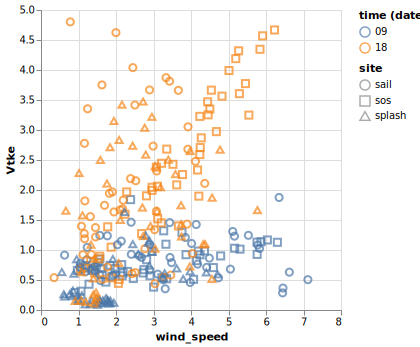

In [314]:
src =     combo_surf_scaling_df[
        (combo_surf_scaling_df.time.dt.date == dt.date(2023, 4, 9))
        |
        (combo_surf_scaling_df.time.dt.date == dt.date(2023, 4, 18))
    ]
src['Vtke'] = src['TKE']**0.5
two_days_per_site_chart = alt.Chart(
    src
).mark_point(size=50).encode(
    alt.X('wind_speed:Q'),
    alt.Y('Vtke:Q'),
    alt.Color('date(time):N'),
    alt.Shape('site:N')
)
two_days_per_site_chart

# Observations - seasonal

## Open data for whole season

In [116]:
start_date = '20221130'
end_date = '20230509'

dates = generate_date_range(start_date, end_date)
dates[0], dates[-1], len(dates)

('20221130', '20230509', 161)

### Gothic Sail Tower data

In [117]:
# Define the data codes for meteorological and turbulence data
data_codes = [
    'gucmetM1.b1',  # Example data code for meteorological data
    'guc30ecorS3.b1'  # Example data code for turbulence data
]

# Loop through each data code and download the data
data_dict = {}
for data_code in data_codes:
    files = act.discovery.download_arm_data(
        username,  # Replace with your ARM username
        token,        # Replace with your ARM token
        data_code,
        start_date,
        end_date,
        output = os.path.join(data_dir, data_code)
    )
    print(files)
    # Load the data into an ACT object and append to the list
    ds = act.io.read_arm_netcdf(files)
    data_dict[data_code] = ds

gothic_met = data_dict[data_codes[0]]
gothic_ec = data_dict[data_codes[1]]

ARM Data Live Webservice does not appear to be functioning
[]


OSError: no files to open

In [192]:
files = pd.Series(dates).apply(
    lambda d: glob.glob(os.path.join(data_dir, 'guc30ecorS3.b1', f"*{d}*.cdf"))
)

In [193]:
files = sorted(list((files).explode().dropna()))
sail_ecor_ds = xr.open_mfdataset(files)

In [194]:
sail_ecor_df = sail_ecor_ds[['var_u', 'var_v', 'var_w', 'wind_spd']].to_dataframe().reset_index()
sail_ecor_df_localtime = utils.modify_df_timezone(sail_ecor_df, 'UTC', 'US/Mountain')
sail_ecor_df_localtime = sail_ecor_df_localtime.set_index('time')
sail_ecor_df_localtime

,var_u,var_v,var_w,wind_spd
time,,,,
2022-11-29 17:00:00,2.6620,3.0730,0.11260,3.2020
2022-11-29 17:30:00,2.5180,1.2400,0.18060,4.1590
2022-11-29 18:00:00,2.0500,1.3280,0.14480,3.7520
2022-11-29 18:30:00,1.2320,1.5930,0.09134,1.4730
2022-11-29 19:00:00,0.2859,2.1540,0.03730,0.7446
...,...,...,...,...
2023-05-09 15:30:00,2.7880,2.4690,0.13430,3.2070
2023-05-09 16:00:00,2.0850,3.2970,0.19560,4.5460
2023-05-09 16:30:00,1.4430,0.8279,0.07900,2.6550


### Avery Picnic SPLASH Tower data

In [128]:
files = pd.Series(dates).apply(
    lambda d: glob.glob(os.path.join(data_dir, "asfs/ASFS-50_Level2_SPLASH2021-2023/", f"sledseb.asfs50.level2.0.10min.{d}*.nc"))
).explode().dropna()
files = sorted(files)
files

['/Users/elischwat/Development/data/sublimationofsnow/asfs/ASFS-50_Level2_SPLASH2021-2023/sledseb.asfs50.level2.0.10min.20221130.000000.nc',
 '/Users/elischwat/Development/data/sublimationofsnow/asfs/ASFS-50_Level2_SPLASH2021-2023/sledseb.asfs50.level2.0.10min.20221201.000000.nc',
 '/Users/elischwat/Development/data/sublimationofsnow/asfs/ASFS-50_Level2_SPLASH2021-2023/sledseb.asfs50.level2.0.10min.20221202.000000.nc',
 '/Users/elischwat/Development/data/sublimationofsnow/asfs/ASFS-50_Level2_SPLASH2021-2023/sledseb.asfs50.level2.0.10min.20221203.000000.nc',
 '/Users/elischwat/Development/data/sublimationofsnow/asfs/ASFS-50_Level2_SPLASH2021-2023/sledseb.asfs50.level2.0.10min.20221204.000000.nc',
 '/Users/elischwat/Development/data/sublimationofsnow/asfs/ASFS-50_Level2_SPLASH2021-2023/sledseb.asfs50.level2.0.10min.20221205.000000.nc',
 '/Users/elischwat/Development/data/sublimationofsnow/asfs/ASFS-50_Level2_SPLASH2021-2023/sledseb.asfs50.level2.0.10min.20221206.000000.nc',
 '/Users/elis

In [69]:
splash_asfs_ds = xr.open_mfdataset(files)

In [70]:
splash_asfs_ds = splash_asfs_ds[[
    'wspd_vec_mean',
    'time',
    'sigU',
    'sigV',
    'sigW',
]].resample(time='30min').mean()

In [122]:
splash_asfs_df = splash_asfs_ds.to_dataframe().reset_index()
splash_asfs_df_localtime = utils.modify_df_timezone(splash_asfs_df, 'UTC', 'US/Mountain')
splash_asfs_df_localtime = splash_asfs_df_localtime.rename(columns={ 'wspd_vec_mean': 'wind_speed',})
splash_asfs_df_localtime

,time,wind_speed,sigU,sigV,sigW
0,2022-11-29 17:00:00,4.543221,0.414720,0.397108,0.447469
1,2022-11-29 17:30:00,3.607009,0.239186,0.277151,0.317775
2,2022-11-29 18:00:00,1.952154,0.182028,0.306957,0.211905
3,2022-11-29 18:30:00,1.234980,0.129293,0.162647,0.173020
4,2022-11-29 19:00:00,1.803138,0.113087,0.132055,0.231247
...,...,...,...,...,...
7723,2023-05-09 15:30:00,3.099264,0.204873,0.146780,0.248597
7724,2023-05-09 16:00:00,2.550870,0.121606,0.111046,0.273773
7725,2023-05-09 16:30:00,3.129059,0.374115,0.396995,0.288181
7726,2023-05-09 17:00:00,2.226260,0.253840,0.291463,0.234804


In [147]:
splash_asfs_df_localtime['TKE'] = (splash_asfs_df_localtime[['sigU', 'sigV', 'sigW']]**2).sum(axis=1)

## Create figure for paper

In [195]:
sos_scaling_src = sos_df_localtime[sos_df_localtime.variable.isin(['tke_3m_c', 'spd_3m_c'])].pivot_table(values='value', index='time', columns='variable')
sos_scaling_src = sos_scaling_src.rename(columns={ 'spd_3m_c': 'wind_speed', 'tke_3m_c': 'TKE'})
sos_scaling_src

variable,wind_speed,TKE
time,,
2022-10-31 18:00:00,2.996172,0.220328
2022-10-31 18:30:00,2.772876,0.495805
2022-10-31 19:00:00,2.766295,0.441754
2022-10-31 19:30:00,2.972261,0.455170
2022-10-31 20:00:00,2.416516,0.313830
...,...,...
2023-06-19 15:30:00,3.109800,5.355149
2023-06-19 16:00:00,4.079733,2.345271
2023-06-19 16:30:00,3.729555,4.161733


In [198]:
sail_ecor_df_localtime['TKE'] = 0.5*(sail_ecor_df_localtime[['var_u', 'var_v', 'var_w']]).sum(axis=1).values
sail_ecor_df_localtime = sail_ecor_df_localtime.rename(columns={ 'wind_spd': 'wind_speed'})
sail_ecor_df_localtime

,var_u,var_v,var_w,wind_speed,TKE
time,,,,,
2022-11-29 17:00:00,2.6620,3.0730,0.11260,3.2020,2.923800
2022-11-29 17:30:00,2.5180,1.2400,0.18060,4.1590,1.969300
2022-11-29 18:00:00,2.0500,1.3280,0.14480,3.7520,1.761400
2022-11-29 18:30:00,1.2320,1.5930,0.09134,1.4730,1.458170
2022-11-29 19:00:00,0.2859,2.1540,0.03730,0.7446,1.238600
...,...,...,...,...,...
2023-05-09 15:30:00,2.7880,2.4690,0.13430,3.2070,2.695650
2023-05-09 16:00:00,2.0850,3.2970,0.19560,4.5460,2.788800
2023-05-09 16:30:00,1.4430,0.8279,0.07900,2.6550,1.174950


In [199]:
combo_surf_scaling_seasonal_df = pd.concat([
    sos_scaling_src[['wind_speed', 'TKE']].assign(site = 'sos'), 
    sail_ecor_df_localtime[['wind_speed', 'TKE']].assign(site = 'sail'), 
    splash_asfs_df_localtime.set_index('time')[['wind_speed', 'TKE']].assign(site = 'splash')
]).dropna()

## Open cross-valley/along-valley wind times

In [200]:
cross_valley_wind_times = pd.to_datetime(pd.read_csv('cross_valley_wind_times.csv')['0'])
along_valley_wind_times =  pd.to_datetime(pd.read_csv('along_valley_wind_times.csv')['0'])

label data as cross/along-valley

In [201]:
combo_surf_scaling_seasonal_df_categorized = pd.concat([
    combo_surf_scaling_seasonal_df[combo_surf_scaling_seasonal_df.index.isin(cross_valley_wind_times)].assign(category = 'cross-valley'),
    combo_surf_scaling_seasonal_df[combo_surf_scaling_seasonal_df.index.isin(along_valley_wind_times)].assign(category = 'along-valley')
])

## Open synoptic wind speeds

In [269]:
# CSV is crated in surface_scaling_analysis.ipynb
synoptic_winds_pdf_data = pd.read_csv("synoptic_winds_pdf_data.csv", index_col='time')
synoptic_winds_pdf_data.index = pd.to_datetime(synoptic_winds_pdf_data.index)

label data as fast/slow synoptic wind speeds

In [273]:
combo_surf_scaling_seasonal_df_categorized = pd.concat([
    combo_surf_scaling_seasonal_df_categorized[combo_surf_scaling_seasonal_df_categorized.index.isin(
        synoptic_winds_pdf_data.query("wind_speed <= 10").index
    )].assign(synoptic_wind_speed = '<= 10 m/s'),
    combo_surf_scaling_seasonal_df_categorized[combo_surf_scaling_seasonal_df_categorized.index.isin(
        synoptic_winds_pdf_data.query("wind_speed > 10").index
    )].assign(synoptic_wind_speed = '> 10 m/s')
]).reset_index()

In [257]:
combo_surf_scaling_seasonal_df_categorized['spd_bin'] = pd.cut(
    combo_surf_scaling_seasonal_df_categorized['wind_speed'], 
    np.arange(0,11), 
    # labels = [f"{lo}-{hi}" for lo, hi in zip(np.arange(0,11), np.arange(1,11))]
    labels = [float((lo + hi)/2) for lo, hi in zip(np.arange(0,11), np.arange(1,11))]
).astype(float)

/var/folders/x_/2h52bcjx2px15bhmdpdd748h0000gn/T/ipykernel_29467/2878952581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  src['Vtke'] = src['TKE']**0.5


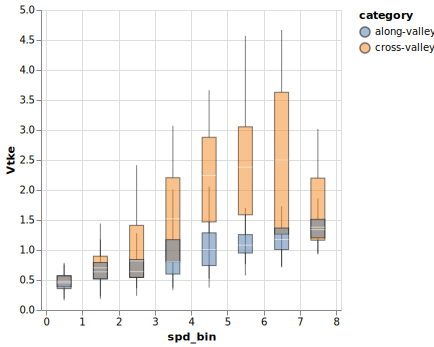

In [315]:
src = combo_surf_scaling_seasonal_df_categorized.query("site == 'sos'")
src['Vtke'] = src['TKE']**0.5
allseason_sos_chart = alt.Chart(
    src.query("spd_bin < 8")
).mark_boxplot(
        outliers=False, opacity=0.5, box={'stroke': 'black'}
).encode(
    alt.X('spd_bin:Q').scale(domain=[0,8], nice=False),
    alt.Y('Vtke:Q'),
    alt.Color('category:N'),
    # alt.Column('site:N'),
)
allseason_sos_chart

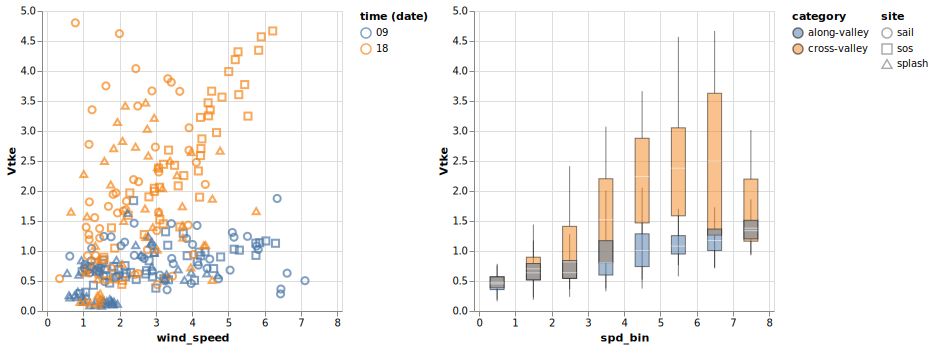

In [320]:
(two_days_per_site_chart | allseason_sos_chart).resolve_scale(
    color='independent',
    y='shared',
    x='shared'
)

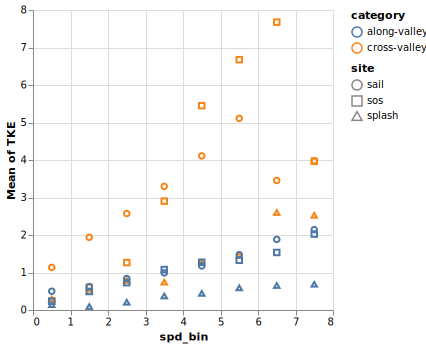

In [290]:
alt.Chart(
    combo_surf_scaling_seasonal_df_categorized.dropna().query("spd_bin <= 8")
).mark_point().encode(
    alt.X('spd_bin:Q'),
    alt.XOffset('site:N'),
    alt.Y('mean(TKE):Q'),
    alt.Shape('site:N'),
    alt.Color('category:N'),
    # alt.Column('site:N'),
)

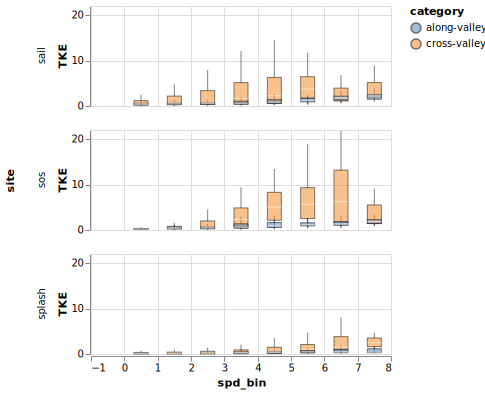

In [292]:
alt.Chart(
    combo_surf_scaling_seasonal_df_categorized.dropna().query("spd_bin <= 8")
).mark_boxplot(
    outliers=False, opacity=0.5, box={'stroke': 'black'}
).encode(
    alt.X('spd_bin:Q'),
    alt.Y('TKE:Q'),
    alt.Color('category:N'),
    alt.Row('site:N'),
).properties(height=100)

In [293]:
synoptic_winds_pdf_data

,wind_speed,wind_direction,synoptic_wind
time,,,
2022-12-01 17:00:00,9.238703,236.11954,cross valley
2022-12-01 17:30:00,9.238703,236.11954,cross valley
2022-12-01 18:00:00,14.224988,228.40544,cross valley
2022-12-01 18:30:00,14.224988,228.40544,cross valley
2022-12-01 19:00:00,12.255487,233.46048,cross valley
...,...,...,...
2023-06-14 14:30:00,6.697312,299.92730,along valley
2023-06-14 17:00:00,6.256010,303.37323,along valley
2023-06-14 17:30:00,6.256010,303.37323,along valley


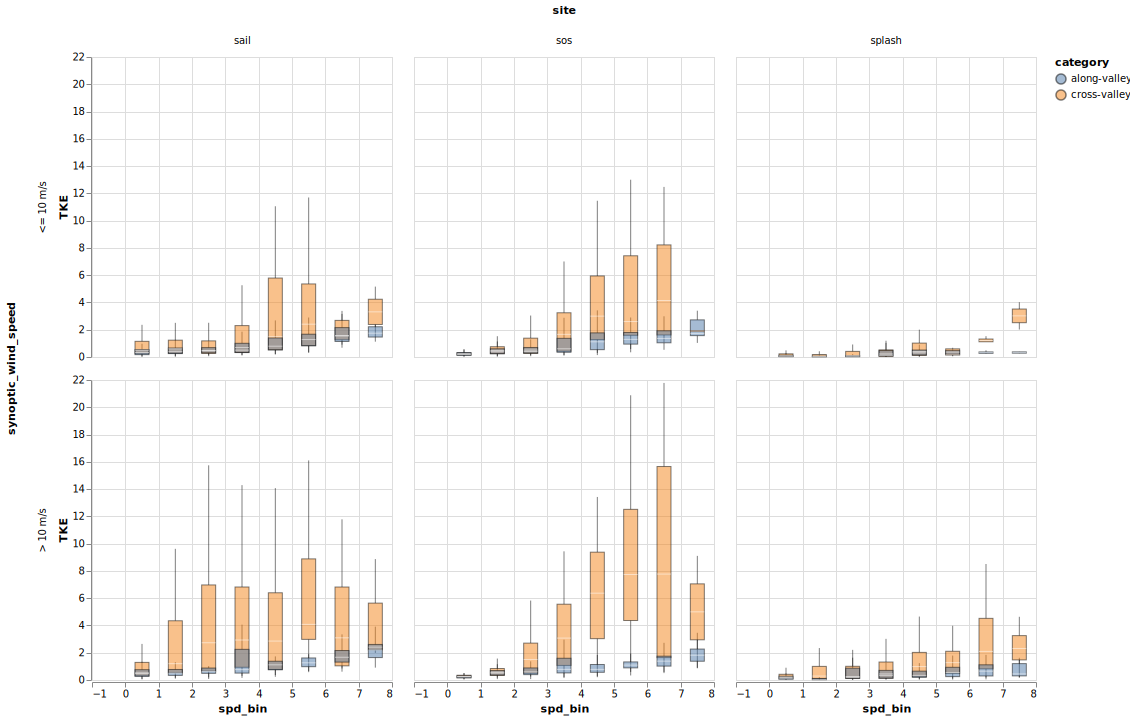

In [276]:
alt.Chart(
    combo_surf_scaling_seasonal_df_categorized.dropna().query("spd_bin <= 8")
).mark_boxplot(
    outliers=False, opacity=0.5, box={'stroke': 'black'}
).encode(
    alt.X('spd_bin:Q'),
    alt.Y('TKE:Q'),
    alt.Color('category:N'),
    alt.Column('site:N'),
    alt.Row('synoptic_wind_speed:N')
)